In [4]:
!pip install openmeteo-requests
!pip install requests-cache retry-requests numpy pandas

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 KB 861.9 kB/s eta 0:00:00 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 KB 1.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 KB 1.1 MB/s eta 0:00:00ta 0:00:01


In [2]:
!pip install xarray

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 2.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 5.2 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 6.3 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 KB 4.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.5/505.5 KB 8.3 MB/s eta 0:00:00a 0:00:01


In [9]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 3.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 5.2 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 5.2 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.7/310.7 KB 5.0 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 6.3 MB/s eta 0:00:0000:0100:01m
Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install cartopy

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 6.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 6.2 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 3.8 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 KB 1.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install scipy

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 738.5 kB/s eta 0:00:000:0100:01
Note: you may need to restart the kernel to use updated packages.


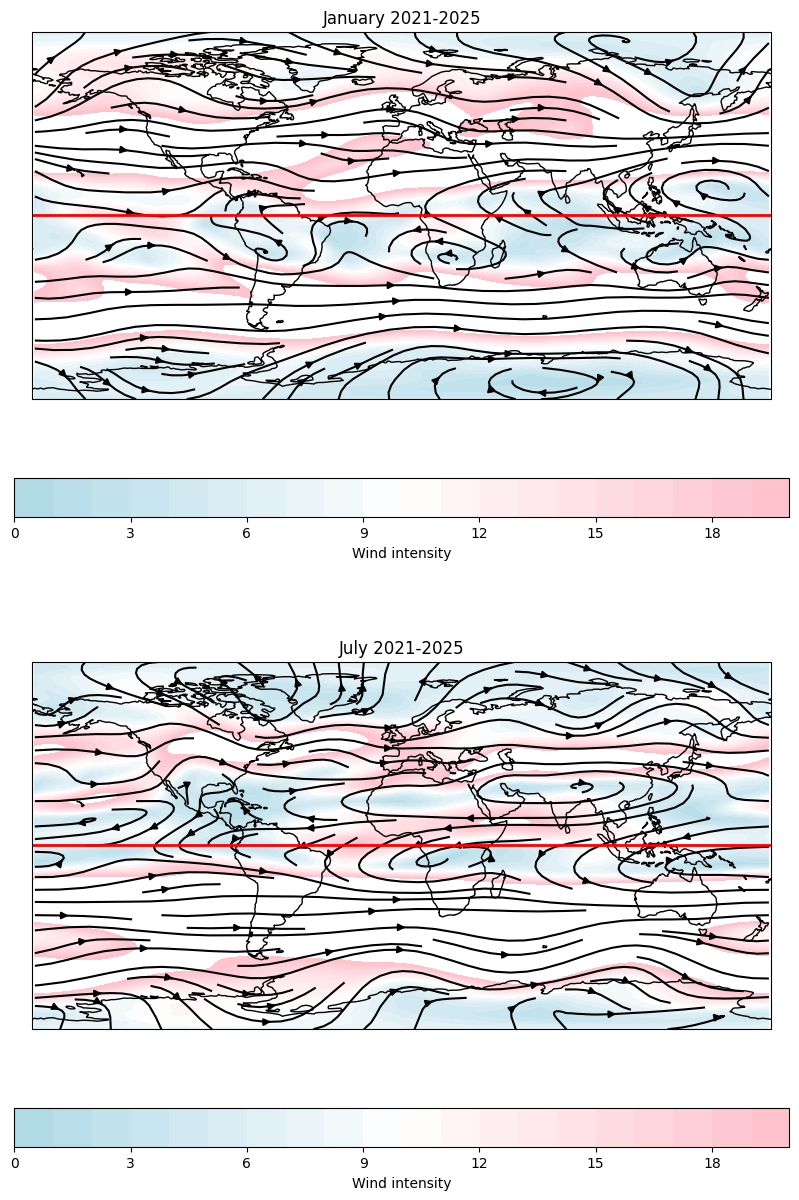

In [26]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
from matplotlib.colors import LinearSegmentedColormap

# Load the data
va = xr.open_dataset('va_Amon_GFDL-CM2p1_historical_r1i1p1_202101-202512.nc')
ua = xr.open_dataset('ua_Amon_GFDL-CM2p1_historical_r1i1p1_202101-202512.nc')
zg = xr.open_dataset('zg_Amon_GFDL-CM2p1_historical_r1i1p1_202101-202512.nc')

# Select the data for 250hPa (25000 Pa)
va_250 = va.sel(plev=25000)
ua_250 = ua.sel(plev=25000)
zg_250 = zg.sel(plev=25000)

# Select the data for January and July of each year
va_jan = va_250.sel(time=va_250.time.dt.month==1)
ua_jan = ua_250.sel(time=ua_250.time.dt.month==1)
zg_jan = zg_250.sel(time=zg_250.time.dt.month==1)

va_jul = va_250.sel(time=va_250.time.dt.month==7)
ua_jul = ua_250.sel(time=ua_250.time.dt.month==7)
zg_jul = zg_250.sel(time=zg_250.time.dt.month==7)

# Convert the longitude to the range of -180 to 180 degrees
va_jan = va_jan.assign_coords(lon=(((va_jan.lon + 180) % 360) - 180)).sortby('lon')
ua_jan = ua_jan.assign_coords(lon=(((ua_jan.lon + 180) % 360) - 180)).sortby('lon')
zg_jan = zg_jan.assign_coords(lon=(((zg_jan.lon + 180) % 360) - 180)).sortby('lon')

va_jul = va_jul.assign_coords(lon=(((va_jul.lon + 180) % 360) - 180)).sortby('lon')
ua_jul = ua_jul.assign_coords(lon=(((ua_jul.lon + 180) % 360) - 180)).sortby('lon')
zg_jul = zg_jul.assign_coords(lon=(((zg_jul.lon + 180) % 360) - 180)).sortby('lon')

# Calculate the average wind intensity for January and July from 2021 to 2025
wind_jan = np.sqrt(va_jan['va']**2 + ua_jan['ua']**2).mean(dim='time')
wind_jul = np.sqrt(va_jul['va']**2 + ua_jul['ua']**2).mean(dim='time')

# Normalize the wind intensity for better visualization
wind_jan = (wind_jan - wind_jan.min()) / (wind_jan.max() - wind_jan.min())
wind_jul = (wind_jul - wind_jul.min()) / (wind_jul.max() - wind_jul.min())

# Select the wind data at 250hPa
wind_jan_250 = np.sqrt(va_jan['va']**2 + ua_jan['ua']**2).mean(dim='time')
wind_jul_250 = np.sqrt(va_jul['va']**2 + ua_jul['ua']**2).mean(dim='time')

# Define the levels for shading
levels = np.linspace(0, 20, 21)  # 21 levels from 0 to 20

# Define the color palette
cmap = LinearSegmentedColormap.from_list('blue_to_red', ['lightblue', 'white', 'pink'])

# Plot the maps
fig, ax = plt.subplots(2, 1, figsize=(10, 15), subplot_kw={'projection': ccrs.PlateCarree()})

# January map
cf = ax[0].contourf(va_jan.lon, va_jan.lat, wind_jan_250, levels=levels, cmap=cmap, transform=ccrs.PlateCarree())
ax[0].set_title('January 2021-2025')
ax[0].coastlines()
fig.colorbar(cf, ax=ax[0], orientation='horizontal', label='Wind intensity')

# Add streamlines for January
lon, lat = np.meshgrid(va_jan.lon, va_jan.lat)
ax[0].streamplot(lon, lat, ua_jan['ua'].mean(dim='time'), va_jan['va'].mean(dim='time'), color='black', transform=ccrs.PlateCarree())

# Add equator line
ax[0].plot([-180, 180], [0, 0], color='red', linewidth=2, transform=ccrs.PlateCarree())

# July map
cf = ax[1].contourf(va_jul.lon, va_jul.lat, wind_jul_250, levels=levels, cmap=cmap, transform=ccrs.PlateCarree())
ax[1].set_title('July 2021-2025')
ax[1].coastlines()
fig.colorbar(cf, ax=ax[1], orientation='horizontal', label='Wind intensity')

# Add streamlines for July
lon, lat = np.meshgrid(va_jul.lon, va_jul.lat)
ax[1].streamplot(lon, lat, ua_jul['ua'].mean(dim='time'), va_jul['va'].mean(dim='time'), color='black', transform=ccrs.PlateCarree())

# Add equator line
ax[1].plot([-180, 180], [0, 0], color='red', linewidth=2, transform=ccrs.PlateCarree())

plt.show()